# Subway Delays in New York City

## Instructions

* In this activity, you will use data gathered from Twitter to plot which trains in the NYC subway system most frequently cause delays.

* The Twitter account **SubwayStats** announces delays and changes in the NYC subway system.

* Your goal is to pull the 1,000 most recent tweets from that account and use MatPlotLib to generate a bar chart of the number of delays per each train:

  ![subway.png](subway.png)

* Accomplish this task by first compiling a Python dictionary, whose key value pairs consist of each train and the number of delays:

  ![subway1.png](subway1.png)

* In order to build such a dictionary, you will need to filter the tweet texts.

* See the Jupyter Notebook file for more specific instructions at each step. Good luck!

In [1]:
# Dependencies
import tweepy
import json
import pandas as pd
import matplotlib.pyplot as plt
from mydata import *
from pprint import pprint
import re

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# Create an empty dictionary that will hold delayed trains
delayed_trains = {}

# Target User = A Twitter account that sends tweets regarding delayed trains
target_user = "SubwayStats"

In [3]:
# Loop through 50 pages of statuses
for x in range(50):

    # Get all tweets from home feed. Set pagination to "x"
    public_tweets = api.user_timeline(target_user, page=x)

    # Loop through all tweets
    for tweet in public_tweets:
        
        # Break tweet text into a list of lowercase words
        tweet_text = tweet["text"].lower().split(" ")
        
        # Print the tweet text only if it contains the word "delays" or "change"
        if("delays" in tweet_text or "change" in tweet_text):
            print(tweet["text"].lower())
            
            # Loop through hashtags to extract the train names
            # Hint: try ["entities"] and ["hashtags]
            for hashtag in tweet['entities']['hashtags']:
                
                # Extract the hashtag's text, and set it to lower case
                train_name = hashtag['text'].lower()
                
                # Remove all hashtags that are extraneous
                if (train_name != "nycsubway" and train_name != "mta" and train_name != "nyc"):
                                        
                    # If train is new, i.e. not in the dictionary, add it to the dictionary, and set its value to 1
                    # Your code here
                    if train_name not in delayed_trains.keys():
                        delayed_trains[train_name] = 1
                    
                    # If it already exists add 1 to its count
                    else:
                        delayed_trains[train_name] = delayed_trains[train_name] + 1
                        

delays on #7train  #mta https://t.co/jh4u3ctg8s
#7train have service change  #mta https://t.co/jh4u3ctg8s
#7train have delays  #nycsubway https://t.co/jh4u3ctg8s
delays reported on #atrain #ctrain and #etrain  #mta https://t.co/jh4u3ctg8s
#atrain #ctrain and #etrain have service change  #nyc https://t.co/jh4u3ctg8s
delays on #atrain #ctrain and #etrain  #mta https://t.co/jh4u3ctg8s
#atrain #ctrain and #etrain have service change  #mta https://t.co/jh4u3ctg8s
#4train #5train and #6train have delays  #nyc https://t.co/jh4u3ctg8s
#btrain #dtrain #ftrain #mtrain have service change  #nyc https://t.co/jh4u3ctg8s
service change on #4train #5train and #6train  #mta https://t.co/jh4u3ctg8s
delays on #btrain #dtrain #ftrain #mtrain  #mta https://t.co/jh4u3ctg8s
#ntrain #qtrain #rtrain #wtrain have service change  #mta https://t.co/jh4u3ctg8s
service change on #atrain #ctrain and #etrain  #mta https://t.co/jh4u3ctg8s
service change reported on #4train #5train and #6train  #mta https://t.co/jh4u3

#4train #5train and #6train have delays [4] woodlawn-bound trains skip 161 st, 167 st, 170 st, mt eden av and 176 s… https://t.co/21vdt1zmwd
#4train #5train and #6train have delays [4] woodlawn-bound trains skip 161 st, 167 st, 170 st, mt eden av and 176 s… https://t.co/wkidpl922a
#btrain #dtrain #ftrain #mtrain have delays [b] brighton beach-bound trains run local from prospect park to kings h… https://t.co/7mcseqszeq
#atrain #ctrain and #etrain have delays  #mta https://t.co/jh4u3ctg8s
#atrain #ctrain and #etrain have service change  #nycsubway https://t.co/jh4u3ctg8s
#ltrain have delays  #mta https://t.co/jh4u3cbejs
delays on #7train [7d] express trains make local stops in both directions at 33, 40, 46, 52, 69 and 74 sts #mta https://t.co/jh4u3ctg8s
delays reported on #jtrain and #ztrain  #mta https://t.co/jh4u3ctg8s
delays on #1train #2train and #3train  #mta https://t.co/jh4u3ctg8s
delays reported on #btrain #dtrain #ftrain #mtrain  #mta https://t.co/jh4u3ctg8s
#jtrain and #ztrain

#ntrain #qtrain #rtrain #wtrain have service change [n] astoria-bound trains run express from 59 st, brooklyn to at… https://t.co/sqeebxr6dj
delays reported on #atrain #ctrain and #etrain [a] ozone park/far rockaway-bound trains skip 116, 110, 103, 96, 86,… https://t.co/wzdd521nr8
#btrain #dtrain #ftrain #mtrain have service change [d] coney island-bound trains run local from dekalb av to 36 st… https://t.co/eze21nrt5z
service change on #atrain #ctrain and #etrain [a] ozone park/far rockaway-bound trains skip 116, 110, 103, 96, 86,… https://t.co/tcpaxhfxyq
service change reported on #ntrain #qtrain #rtrain #wtrain [n] coney island-bound trains run local from dekalb av t… https://t.co/tbkezqsrgn
#btrain #dtrain #ftrain #mtrain have service change [d] coney island-bound trains run local from dekalb av to 36 st… https://t.co/kmeudopgvs
#atrain #ctrain and #etrain have service change [c] 168 st-bound trains skip spring st, 23 st and 50 st #mta https://t.co/jh4u3ctg8s
#ntrain #qtrain #rtrai

delays reported on #1train #2train and #3train  #mta https://t.co/jh4u3ctg8s
#1train #2train and #3train have service change  #nyc https://t.co/jh4u3ctg8s
#ntrain #qtrain #rtrain #wtrain have delays  #mta https://t.co/jh4u3ctg8s
delays on #btrain #dtrain #ftrain #mtrain  #mta https://t.co/jh4u3ctg8s
#ntrain #qtrain #rtrain #wtrain have service change  #nycsubway https://t.co/jh4u3ctg8s
#btrain #dtrain #ftrain #mtrain have service change  #mta https://t.co/jh4u3ctg8s
delays reported on #ntrain #qtrain #rtrain #wtrain  #mta https://t.co/jh4u3ctg8s
#btrain #dtrain #ftrain #mtrain have delays  #nycsubway https://t.co/jh4u3ctg8s
#sirtrain have service change  #nycsubway https://t.co/jh4u3ctg8s
delays reported on #strain  #mta https://t.co/jh4u3ctg8s
#ntrain #qtrain #rtrain #wtrain have service change  #nyc https://t.co/jh4u3ctg8s
service change reported on #btrain #dtrain #ftrain #mtrain  #mta https://t.co/jh4u3ctg8s
delays reported on #sirtrain  #mta https://t.co/jh4u3ctg8s
#strain have se

delays on #4train #5train and #6train [4] woodlawn-bound trains skip 161 st, 167 st, 170 st, mt eden av and 176 st… https://t.co/i6wqzenwre
delays on #7train  #mta https://t.co/jh4u3ctg8s
#4train #5train and #6train have service change [4] woodlawn-bound trains skip 161 st, 167 st, 170 st, mt eden av a… https://t.co/rgyvojdaba
#ntrain #qtrain #rtrain #wtrain have service change [q] 96 st-bound trains run express from kings hwy to prospect p… https://t.co/nvswkt6h40
delays reported on #btrain #dtrain #ftrain #mtrain [b] brighton beach-bound trains run local from prospect park to… https://t.co/ivior0ni4y
#7train have delays [7d] express trains make local stops in both directions at 33, 40, 46, 52, 69 and 74 sts… https://t.co/bjzk1mvaqf
delays reported on #ntrain #qtrain #rtrain #wtrain  #mta https://t.co/jh4u3ctg8s
service change reported on #7train [7d] express trains make local stops in both directions at 33, 40, 46, 52, 69 an… https://t.co/8qsmq3il6d
#btrain #dtrain #ftrain #mtrain ha

#btrain #dtrain #ftrain #mtrain have delays  #mta https://t.co/jh4u3ctg8s
#7train have delays [7d] express trains make local stops in both directions at 33, 40, 46, 52, 69 and 74 sts #mta https://t.co/jh4u3ctg8s
#ntrain #qtrain #rtrain #wtrain have service change  #mta https://t.co/jh4u3ctg8s
#btrain #dtrain #ftrain #mtrain have service change  #nycsubway https://t.co/jh4u3ctg8s
delays reported on #btrain #dtrain #ftrain #mtrain  #mta https://t.co/jh4u3ctg8s
#ntrain #qtrain #rtrain #wtrain have delays  #nycsubway https://t.co/jh4u3ctg8s
#btrain #dtrain #ftrain #mtrain have delays  #nyc https://t.co/jh4u3ctg8s
delays reported on #7train  #mta https://t.co/jh4u3ctg8s
#7train have service change  #nyc https://t.co/jh4u3ctg8s
delays on #jtrain and #ztrain  #mta https://t.co/jh4u3ctg8s
#1train #2train and #3train have delays [1] [2] trains make all [3] stops between 14 st and 135 st. #nycsubway https://t.co/jh4u3ctg8s
delays reported on #4train #5train and #6train [4] no trains between utic

delays on #ntrain #qtrain #rtrain #wtrain  #mta https://t.co/jh4u3ctg8s
#ntrain #qtrain #rtrain #wtrain have delays  #mta https://t.co/jh4u3ctg8s
#ntrain #qtrain #rtrain #wtrain have delays  #nycsubway https://t.co/jh4u3ctg8s
#btrain #dtrain #ftrain #mtrain have delays [m] shuttle trains run every 20 minutes between metropolitan av and myr… https://t.co/d6aflrjpi3
#btrain #dtrain #ftrain #mtrain have delays  #mta https://t.co/jh4u3ctg8s
#atrain #ctrain and #etrain have delays  #nycsubway https://t.co/jh4u3ctg8s
#btrain #dtrain #ftrain #mtrain have service change  #nycsubway https://t.co/jh4u3ctg8s
service change reported on #atrain #ctrain and #etrain  #mta https://t.co/jh4u3ctg8s
delays reported on #4train #5train and #6train  #mta https://t.co/jh4u3ctg8s
#4train #5train and #6train have delays  #nyc https://t.co/jh4u3ctg8s
delays on #4train #5train and #6train  #mta https://t.co/jh4u3ctg8s
delays on #1train #2train and #3train  #mta https://t.co/jh4u3ctg8s
#gtrain have delays  #nycsu

service change on #btrain #dtrain #ftrain #mtrain  #mta https://t.co/jh4u3ctg8s
delays reported on #atrain #ctrain and #etrain  #mta https://t.co/jh4u3ctg8s
service change reported on #ntrain #qtrain #rtrain #wtrain  #mta https://t.co/jh4u3ctg8s
service change on #atrain #ctrain and #etrain  #mta https://t.co/jh4u3ctg8s
#ntrain #qtrain #rtrain #wtrain have delays  #nyc https://t.co/jh4u3ctg8s
#btrain #dtrain #ftrain #mtrain have delays  #nycsubway https://t.co/jh4u3ctg8s
#atrain #ctrain and #etrain have delays  #mta https://t.co/jh4u3ctg8s
service change reported on #btrain #dtrain #ftrain #mtrain  #mta https://t.co/jh4u3ctg8s
#btrain #dtrain #ftrain #mtrain have delays  #nyc https://t.co/jh4u3ctg8s
service change reported on #4train #5train and #6train  #mta https://t.co/jh4u3ctg8s
service change on #ntrain #qtrain #rtrain #wtrain  #mta https://t.co/jh4u3ctg8s
service change on #btrain #dtrain #ftrain #mtrain  #mta https://t.co/jh4u3cbejs
delays reported on #atrain #ctrain and #etrain

In [6]:
# Print the Train Delay counts
print(delayed_trains)

# Convert Train Delay object into a pandas series
delayed_trains_pd = pd.Series(delayed_trains)

# Preview the results
delayed_trains_pd

{'7train': 36, 'atrain': 105, 'ctrain': 105, 'etrain': 105, '4train': 123, '5train': 123, '6train': 123, 'btrain': 163, 'dtrain': 163, 'ftrain': 163, 'mtrain': 163, 'ntrain': 117, 'qtrain': 117, 'rtrain': 117, 'wtrain': 117, 'ltrain': 29, 'jtrain': 28, 'ztrain': 28, '1train': 89, '2train': 89, '3train': 89, 'gtrain': 13, 'sirtrain': 5, 'strain': 4}


1train       89
2train       89
3train       89
4train      123
5train      123
6train      123
7train       36
atrain      105
btrain      163
ctrain      105
dtrain      163
etrain      105
ftrain      163
gtrain       13
jtrain       28
ltrain       29
mtrain      163
ntrain      117
qtrain      117
rtrain      117
sirtrain      5
strain        4
wtrain      117
ztrain       28
dtype: int64

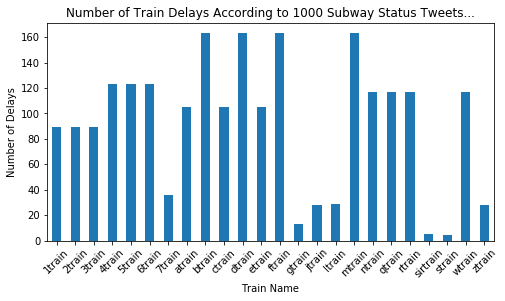

In [22]:
# Create a plot  
delayed_trains_pd.plot.bar(figsize=(8, 4), rot=45)
plt.ylabel("Number of Delays")
plt.xlabel("Train Name")
plt.title("Number of Train Delays According to 1000 Subway Status Tweets...")
plt.show()